# Desenhando com o `pandas`

Assume-se um conhecimento inicial da biblioteca `pandas`, veja as [notas de aula](intro_pandas.ipynb).


In [1]:
import pandas as pd

# importa os dados removendo a coluna de índice e sort_no
movies = pd.read_csv("data/movies.csv").drop(columns=['id', 'sort_no'])
movies


,metascore,rating,release_date,summary,title,user_score
0,94,TV-14,"July 26, 1989",A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,94,PG-13,"December 8, 2000","In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,94,G,"September 11, 1970","In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,94,TV-PG,"January 15, 1943",A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,94,PG,"June 19, 2015","Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
...,...,...,...,...,...,...
15320,1,PG,"August 22, 1987",Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7
15321,1,Not Rated,"June 5, 2015","Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7
15322,1,PG-13,"January 12, 1996",Five brave scientists are forced to face life ...,Bio-Dome,7.5
15323,1,Not Rated,"August 12, 2005",Quite definitely one of the most brutal displa...,Chaos,2.5


## Limpando os dados


In [2]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15325 entries, 0 to 15324
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metascore     15325 non-null  int64 
 1   rating        14201 non-null  object
 2   release_date  15325 non-null  object
 3   summary       15322 non-null  object
 4   title         15325 non-null  object
 5   user_score    15325 non-null  object
dtypes: int64(1), object(5)
memory usage: 718.5+ KB


Primeiramente vamos melhorar essas colunas...
Temos datas que estão com formato `object` (que é uma string).
Temos categorias assim também.
Temos algo que parece ser um número, mas que não está assim `user_score`.


In [3]:
# Considerando categorias

movies['rating'].unique()


array(['TV-14', 'PG-13', 'G', 'TV-PG', 'PG', 'R', 'Passed', 'Not Rated',
       'TV-G', 'TV-MA', 'Approved', nan, 'Unrated', 'GP', 'M', 'M/PG',
       'NR', 'NC-17', 'Open', 'X', 'MA-17', 'PG--13', 'PG-13`', 'TV-Y7',
       'TV-Y7-FV'], dtype=object)

Aqui parece um bom lugar para transformar todos os _PG-13_, _PG--13_ e _PG13\`_ em uma coisa só.


In [4]:
# Muda todos os ratings parecidos em algo padronizado
movies['rating'] = movies['rating'].map(
    lambda x: "PG-13" if x in ['PG--13', 'PG-13`'] else x)
movies['rating'].unique()


array(['TV-14', 'PG-13', 'G', 'TV-PG', 'PG', 'R', 'Passed', 'Not Rated',
       'TV-G', 'TV-MA', 'Approved', nan, 'Unrated', 'GP', 'M', 'M/PG',
       'NR', 'NC-17', 'Open', 'X', 'MA-17', 'TV-Y7', 'TV-Y7-FV'],
      dtype=object)

In [5]:
# Muda a coluna rating para uma categoria, que torna as operações mais rápidas
movies['rating'] = movies['rating'].astype('category')
movies['rating'].dtype


CategoricalDtype(categories=['Approved', 'G', 'GP', 'M', 'M/PG', 'MA-17', 'NC-17', 'NR',
                  'Not Rated', 'Open', 'PG', 'PG-13', 'Passed', 'R', 'TV-14',
                  'TV-G', 'TV-MA', 'TV-PG', 'TV-Y7', 'TV-Y7-FV', 'Unrated',
                  'X'],
, ordered=False)

In [6]:
# Remove todos os filmes que não tem algum valor faltando
movies = movies.dropna()
movies


,metascore,rating,release_date,summary,title,user_score
0,94,TV-14,"July 26, 1989",A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,94,PG-13,"December 8, 2000","In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,94,G,"September 11, 1970","In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,94,TV-PG,"January 15, 1943",A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,94,PG,"June 19, 2015","Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
...,...,...,...,...,...,...
15320,1,PG,"August 22, 1987",Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7
15321,1,Not Rated,"June 5, 2015","Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7
15322,1,PG-13,"January 12, 1996",Five brave scientists are forced to face life ...,Bio-Dome,7.5
15323,1,Not Rated,"August 12, 2005",Quite definitely one of the most brutal displa...,Chaos,2.5


In [7]:
# user_score tem notas que são tbd em vez de números
movies['user_score'].unique()


array(['8.9', '8.2', '6.5', '8.7', '7', '6.7', '7.9', '6.8', '6.6', '6.9',
       '8.8', '8', '8.1', '8.4', '7.6', '7.4', 'tbd', '7.8', '7.1', '8.5',
       '8.3', '7.2', '6.3', '7.7', '7.3', '7.5', '5.9', '0.8', '9', '8.6',
       '5.2', '6', '9.2', '5.3', '6.4', '6.1', '4.5', '6.2', '4.6', '5.7',
       '3.9', '2.5', '5.5', '2.6', '5.4', '5', '4', '5.1', '4.2', '4.9',
       '4.1', '5.8', '4.8', '5.6', '4.4', '3.5', '0.5', '2.4', '4.3',
       '3.4', '2.8', '2.2', '3', '1.8', '3.3', '3.2', '4.7', '2.3', '3.8',
       '1.5', '3.6', '0.6', '1.1', '3.7', '3.1', '1.6', '1.4', '0.9', '2',
       '0.3', '2.1', '2.7', '1.2', '1', '2.9', '1.9', '1.7', '1.3', '0.7'],
      dtype=object)

In [8]:
list_to_drop = movies['user_score'] == "tbd"
movies[list_to_drop]
movies = movies.drop(movies[list_to_drop].index, axis=0)
movies


,metascore,rating,release_date,summary,title,user_score
0,94,TV-14,"July 26, 1989",A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,94,PG-13,"December 8, 2000","In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,94,G,"September 11, 1970","In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,94,TV-PG,"January 15, 1943",A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,94,PG,"June 19, 2015","Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
...,...,...,...,...,...,...
15320,1,PG,"August 22, 1987",Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7
15321,1,Not Rated,"June 5, 2015","Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7
15322,1,PG-13,"January 12, 1996",Five brave scientists are forced to face life ...,Bio-Dome,7.5
15323,1,Not Rated,"August 12, 2005",Quite definitely one of the most brutal displa...,Chaos,2.5


In [9]:
# Agora sem os valores não numéricos podemos transformar essa coluna em numérica
movies['user_score'] = pd.to_numeric(movies['user_score'])
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11481 entries, 0 to 15324
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   metascore     11481 non-null  int64   
 1   rating        11481 non-null  category
 2   release_date  11481 non-null  object  
 3   summary       11481 non-null  object  
 4   title         11481 non-null  object  
 5   user_score    11481 non-null  float64 
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 550.1+ KB


Sumário e título não precisamos mexer...
Fica faltando a data.


In [10]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date']


0       1989-07-26
1       2000-12-08
2       1970-09-11
3       1943-01-15
4       2015-06-19
           ...    
15320   1987-08-22
15321   2015-06-05
15322   1996-01-12
15323   2005-08-12
15324   2018-08-03
Name: release_date, Length: 11481, dtype: datetime64[ns]

In [11]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11481 entries, 0 to 15324
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   metascore     11481 non-null  int64         
 1   rating        11481 non-null  category      
 2   release_date  11481 non-null  datetime64[ns]
 3   summary       11481 non-null  object        
 4   title         11481 non-null  object        
 5   user_score    11481 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 550.1+ KB


In [12]:
# Só falta reiniciar o índice pois como deletamos índices melhor ter os índices sem pulos
movies = movies.reset_index(drop=True)
movies


,metascore,rating,release_date,summary,title,user_score
0,94,TV-14,1989-07-26,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,94,PG-13,2000-12-08,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,94,G,1970-09-11,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,94,TV-PG,1943-01-15,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,94,PG,2015-06-19,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
...,...,...,...,...,...,...
11476,1,PG,1987-08-22,Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7
11477,1,Not Rated,2015-06-05,"Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7
11478,1,PG-13,1996-01-12,Five brave scientists are forced to face life ...,Bio-Dome,7.5
11479,1,Not Rated,2005-08-12,Quite definitely one of the most brutal displa...,Chaos,2.5


## Desenhos

É possível utilizar a biblioteca `matplotlib` para fazer os desenhos, mas o próprio pandas também é capaz de fazer alguns deles usando os métodos `plot`.


In [13]:
# Agrupamos todos os valores por classificação indicadora
group_by_rating = movies.groupby('rating')
group_by_rating.describe()


metascore                                                         \
              count       mean        std   min    25%   50%    75%    max   
rating                                                                       
Approved       88.0  77.306818  14.246885  47.0  66.50  78.0  89.00  100.0   
G             204.0  63.024510  18.143500  11.0  50.00  64.0  77.00   99.0   
GP             17.0  71.176471  12.496176  50.0  62.00  72.0  78.00   97.0   
M               7.0  76.714286  11.397577  63.0  70.00  74.0  81.50   97.0   
M/PG            6.0  78.833333  12.576433  60.0  73.25  79.0  84.75   97.0   
MA-17           1.0  77.000000        NaN  77.0  77.00  77.0  77.00   77.0   
NC-17          57.0  55.192982  16.832620  10.0  48.00  57.0  67.00   90.0   
NR            114.0  65.017544  12.790333  26.0  57.00  68.0  75.00   86.0   
Not Rated    2140.0  66.328037  15.724958   1.0  57.00  69.0  78.00  100.0   
Open            6.0  62.666667  15.667376  41.0  51.00  67.0  72.50   81.0   
PG           1238.0  56.607431  17.390220   1.0  44.00  57.0  70.00  100.0   
PG-13        2359.0  52.697753  17.219477   1.0  40.00  52.0  65.00   99.0   
Passed         45.0  85.311111   7.606284  71.0  78.00  86.0  91.00   99.0   
R            4341.0  57.076941  17.185263   5.0  45.00  58.0  70.00  100.0   
TV-14         117.0  60.239316  17.355139  15.0  48.00  63.0  74.00   94.0   
TV-G           30.0  76.566667  16.560617  26.0  69.25  78.5  91.00  100.0   
TV-MA         241.0  61.983402  16.059516  14.0  52.00  63.0  74.00   95.0   
TV-PG          98.0  70.214286  18.766196  16.0  60.00  72.0  84.00  100.0   
TV-Y7           2.0  43.500000   3.535534  41.0  42.25  43.5  44.75   46.0   
TV-Y7-FV        1.0  43.000000        NaN  43.0  43.00  43.0  43.00   43.0   
Unrated       348.0  60.810345  17.666579   6.0  49.00  65.0  74.00   94.0   
X              21.0  46.285714  22.865133  11.0  30.00  49.0  62.00   79.0   

          user_score                                                    
               count      mean       std  min    25%   50%    75%  max  
rating                                                                  
Approved        88.0  7.492045  0.833249  4.5  7.000  7.60  8.025  8.8  
G              204.0  6.953922  1.245617  2.2  6.375  7.15  7.825  8.9  
GP              17.0  7.288235  0.886624  5.3  6.800  7.60  8.000  8.4  
M                7.0  7.642857  1.123769  6.3  6.550  8.30  8.500  8.8  
M/PG             6.0  7.683333  0.511534  7.1  7.350  7.55  8.050  8.4  
MA-17            1.0  7.300000       NaN  7.3  7.300  7.30  7.300  7.3  
NC-17           57.0  6.371930  1.380962  1.7  5.800  6.50  7.400  8.6  
NR             114.0  6.119298  1.178711  1.8  5.600  6.20  6.800  8.3  
Not Rated     2140.0  6.539486  1.294989  0.7  5.800  6.80  7.500  8.8  
Open             6.0  6.866667  2.301883  2.6  6.525  7.45  8.450  8.7  
PG            1238.0  6.650889  1.417392  0.5  5.900  6.90  7.700  9.0  
PG-13         2359.0  6.523654  1.396518  0.3  5.800  6.70  7.600  9.0  
Passed          45.0  7.611111  0.736460  5.9  7.100  7.70  8.200  8.8  
R             4341.0  6.630293  1.370879  1.1  5.900  6.80  7.700  9.2  
TV-14          117.0  6.766667  1.479690  2.4  6.200  7.20  7.800  8.9  
TV-G            30.0  7.393333  1.008219  4.0  6.800  7.60  8.000  8.8  
TV-MA          241.0  6.633195  1.382110  0.9  5.800  6.80  7.600  8.9  
TV-PG           98.0  7.350000  0.950014  3.2  6.925  7.50  7.900  8.8  
TV-Y7            2.0  6.100000  0.282843  5.9  6.000  6.10  6.200  6.3  
TV-Y7-FV         1.0  7.500000       NaN  7.5  7.500  7.50  7.500  7.5  
Unrated        348.0  6.723276  1.439762  0.9  5.900  7.10  7.800  8.7  
X               21.0  6.766667  1.461278  3.8  5.500  7.20  7.900  8.7

In [14]:
import matplotlib.pyplot as plt


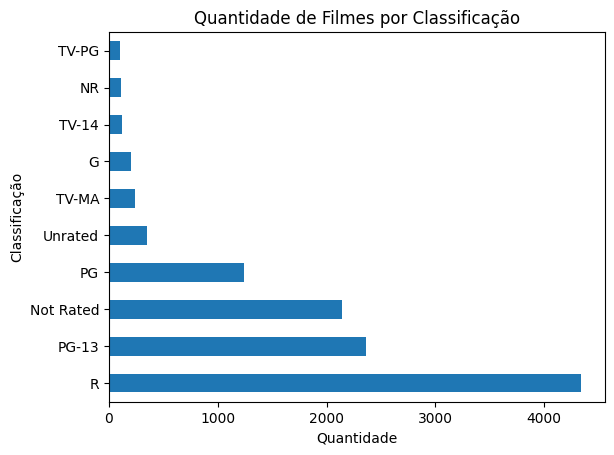

In [15]:
# Agora podemos desenhar um gráfico de barras representando a quantidade de filmes baseado na classificação indicadora
movies['rating'].value_counts() \
    .head(10) \
    .plot \
    .barh(xlabel="Quantidade", ylabel="Classificação", title="Quantidade de Filmes por Classificação")
plt.show()


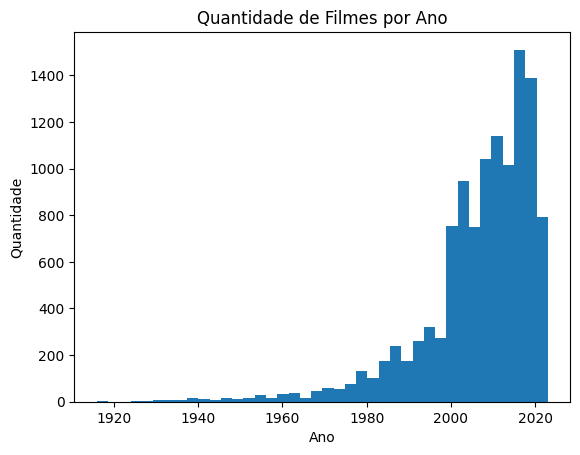

In [16]:
# Ou podemos também ver o score médio baseado na classificação
axes = movies['release_date'].map(lambda x: x.year) \
    .plot \
    .hist(bins=40, title="Quantidade de Filmes por Ano")
axes.set_ylabel("Quantidade")
axes.set_xlabel("Ano")
plt.show()


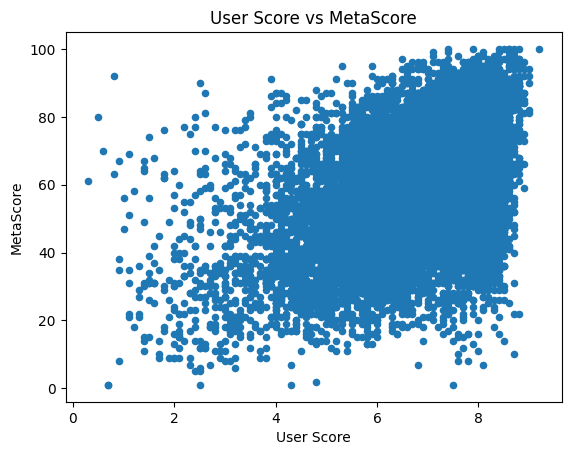

In [17]:
# Agora relacionamos o user score com o metascore

axes = movies.plot.scatter(x="user_score", y="metascore",
                           title="User Score vs MetaScore", xlabel="User Score", ylabel="MetaScore")
plt.show()


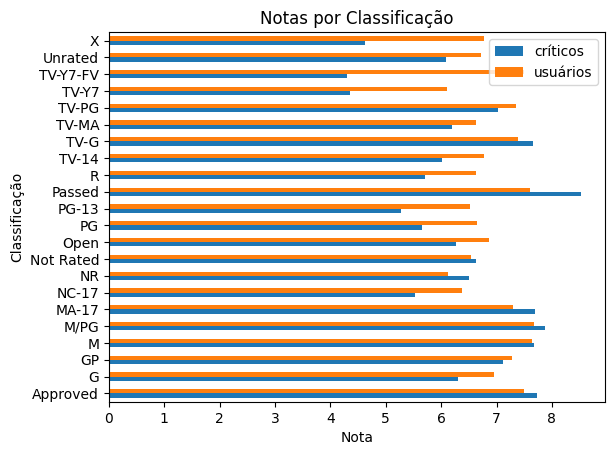

In [18]:
# Podemos comparar o score médio do usuário e dos críticos com a classificação geral do filme

grouped = movies.groupby('rating', sort=True)[
    ['metascore', 'user_score']].mean()
grouped['metascore'] = grouped['metascore'].map(lambda x: x / 10)
axes = grouped.plot.barh(
    xlabel="Nota", ylabel="Classificação", title="Notas por Classificação")
axes.legend(labels=["críticos", "usuários"])
plt.show()


In [19]:
# Finalmente uma tabela de correlação entre os scores
movies[['metascore', 'user_score']].corr()


,metascore,user_score
metascore,1.000000,0.477521
user_score,0.477521,1.000000
